In [1]:
import pickle
import numpy as np

# Data Understanding

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
type(train_data)

list

In [5]:
len(train_data)

10000

In [6]:
len(test_data)

1000

In [7]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
all_data = test_data+train_data
len(all_data)

11000

In [13]:
vocab = set()
for story,question,answers in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [14]:
vocab.add('no')

In [15]:
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab)+1

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
vocab_len = len(vocab)+1
vocab_len

38

In [20]:
all_story_lens = [len(data[0]) for data in all_data]

In [21]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [22]:
max_story_len  = max(all_story_lens)
max_story_len

156

In [23]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

# Data Preprocessing

In [24]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'apple': 1,
 'is': 2,
 'in': 3,
 'grabbed': 4,
 'daniel': 5,
 'garden': 6,
 'football': 7,
 'took': 8,
 'journeyed': 9,
 'discarded': 10,
 'up': 11,
 'milk': 12,
 '.': 13,
 'there': 14,
 'travelled': 15,
 'office': 16,
 'sandra': 17,
 'dropped': 18,
 'went': 19,
 'picked': 20,
 'yes': 21,
 'put': 22,
 'no': 23,
 'the': 24,
 'bedroom': 25,
 'bathroom': 26,
 'to': 27,
 '?': 28,
 'got': 29,
 'mary': 30,
 'down': 31,
 'moved': 32,
 'kitchen': 33,
 'hallway': 34,
 'left': 35,
 'back': 36,
 'john': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []

In [27]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [28]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [29]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [30]:
train_story_seq

[[30, 32, 27, 24, 26, 13, 17, 9, 27, 24, 25, 13],
 [30,
  32,
  27,
  24,
  26,
  13,
  17,
  9,
  27,
  24,
  25,
  13,
  30,
  19,
  36,
  27,
  24,
  25,
  13,
  5,
  19,
  36,
  27,
  24,
  34,
  13],
 [30,
  32,
  27,
  24,
  26,
  13,
  17,
  9,
  27,
  24,
  25,
  13,
  30,
  19,
  36,
  27,
  24,
  25,
  13,
  5,
  19,
  36,
  27,
  24,
  34,
  13,
  17,
  19,
  27,
  24,
  33,
  13,
  5,
  19,
  36,
  27,
  24,
  26,
  13],
 [30,
  32,
  27,
  24,
  26,
  13,
  17,
  9,
  27,
  24,
  25,
  13,
  30,
  19,
  36,
  27,
  24,
  25,
  13,
  5,
  19,
  36,
  27,
  24,
  34,
  13,
  17,
  19,
  27,
  24,
  33,
  13,
  5,
  19,
  36,
  27,
  24,
  26,
  13,
  5,
  20,
  11,
  24,
  7,
  14,
  13,
  5,
  19,
  27,
  24,
  25,
  13],
 [30,
  32,
  27,
  24,
  26,
  13,
  17,
  9,
  27,
  24,
  25,
  13,
  30,
  19,
  36,
  27,
  24,
  25,
  13,
  5,
  19,
  36,
  27,
  24,
  34,
  13,
  17,
  19,
  27,
  24,
  33,
  13,
  5,
  19,
  36,
  27,
  24,
  26,
  13,
  5,
  20,
  11,
  24,
  

In [31]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,
                      max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story,query,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [32]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [33]:
inputs_train.shape

(10000, 156)

In [34]:
inputs_train

array([[ 0,  0,  0, ..., 24, 25, 13],
       [ 0,  0,  0, ..., 24, 34, 13],
       [ 0,  0,  0, ..., 24, 26, 13],
       ...,
       [ 0,  0,  0, ..., 24, 25, 13],
       [ 0,  0,  0, ..., 12, 14, 13],
       [ 0,  0,  0, ...,  1, 14, 13]])

In [35]:
queries_train

array([[ 2, 17,  3, 24, 34, 28],
       [ 2,  5,  3, 24, 26, 28],
       [ 2,  5,  3, 24, 16, 28],
       ...,
       [ 2, 17,  3, 24, 34, 28],
       [ 2, 30,  3, 24, 33, 28],
       [ 2, 30,  3, 24, 25, 28]])

In [36]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [38]:
tokenizer.word_index['yes']

21

In [39]:
tokenizer.word_index['no']

23

In [40]:
#tokenizer.word_index['o']
# KeyError: 'o'

In [41]:
sum(answers_train)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0., 5012.,    0., 4988.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [42]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

# Model Building

In [43]:
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [44]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [45]:
vocab_size = len(vocab)+1

In [46]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(rate=0.3))

In [47]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(rate=0.3))

In [48]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(rate=0.3))

In [49]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
input_encoded_m.shape

TensorShape([None, 156, 64])

In [51]:
input_encoded_c.shape

TensorShape([None, 156, 6])

In [52]:
question_encoded.shape

TensorShape([None, 6, 64])

In [53]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [54]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [55]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [56]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [57]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [58]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
inputs_train.shape

(10000, 156)

In [60]:
queries_train.shape

(10000, 6)

In [61]:
inputs_test.shape

(1000, 156)

In [62]:
inputs_test

array([[ 0,  0,  0, ..., 24, 25, 13],
       [ 0,  0,  0, ..., 24,  6, 13],
       [ 0,  0,  0, ..., 24,  6, 13],
       ...,
       [ 0,  0,  0, ..., 24,  1, 13],
       [ 0,  0,  0, ..., 24,  6, 13],
       [ 0,  0,  0, ...,  1, 14, 13]])

In [63]:
queries_test.shape

(1000, 6)

In [64]:
answers_train.shape

(10000, 38)

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [66]:
history = model.fit([inputs_train, queries_train], 
                    answers_train,batch_size=32,epochs=3,validation_data=([inputs_test, queries_test], 
                    answers_test))

Epoch 1/3
313/313 [==============================] - 4s 7ms/step - loss: 0.9006 - accuracy: 0.4931 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 2/3
313/313 [==============================] - 2s 6ms/step - loss: 0.7019 - accuracy: 0.5003 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 3/3
313/313 [==============================] - 2s 6ms/step - loss: 0.6975 - accuracy: 0.4959 - val_loss: 0.6936 - val_accuracy: 0.4970


In [67]:
history = model.fit([inputs_train, queries_train], 
                    answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], 
                    answers_test))

Epoch 1/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6959 - accuracy: 0.5034 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6952 - accuracy: 0.5062 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6961 - accuracy: 0.4967 - val_loss: 0.6960 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6956 - accuracy: 0.4946 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6953 - accuracy: 0.4993 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6953 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6947 - accuracy: 0.5089 - val_loss: 0.6931 - val_accuracy: 0.5030

Epoch 58/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6375 - accuracy: 0.6449 - val_loss: 0.6218 - val_accuracy: 0.6590
Epoch 59/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6313 - accuracy: 0.6548 - val_loss: 0.6098 - val_accuracy: 0.6720
Epoch 60/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6224 - accuracy: 0.6612 - val_loss: 0.6062 - val_accuracy: 0.6620
Epoch 61/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6082 - accuracy: 0.6753 - val_loss: 0.5927 - val_accuracy: 0.6750
Epoch 62/120
313/313 [==============================] - 2s 6ms/step - loss: 0.5911 - accuracy: 0.6905 - val_loss: 0.5691 - val_accuracy: 0.6970
Epoch 63/120
313/313 [==============================] - 2s 6ms/step - loss: 0.5745 - accuracy: 0.7065 - val_loss: 0.5392 - val_accuracy: 0.7320
Epoch 64/120
313/313 [==============================] - 2s 6ms/step - loss: 0.5565 - accuracy: 0.7254 - val_loss: 0.5170 - val_accuracy:

Epoch 115/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3115 - accuracy: 0.8671 - val_loss: 0.3865 - val_accuracy: 0.8340
Epoch 116/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3128 - accuracy: 0.8678 - val_loss: 0.4089 - val_accuracy: 0.8370
Epoch 117/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3096 - accuracy: 0.8669 - val_loss: 0.3880 - val_accuracy: 0.8180
Epoch 118/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3022 - accuracy: 0.8720 - val_loss: 0.3842 - val_accuracy: 0.8380
Epoch 119/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3024 - accuracy: 0.8710 - val_loss: 0.4025 - val_accuracy: 0.8240
Epoch 120/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3031 - accuracy: 0.8713 - val_loss: 0.3959 - val_accuracy: 0.8160


# Model Evalution

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


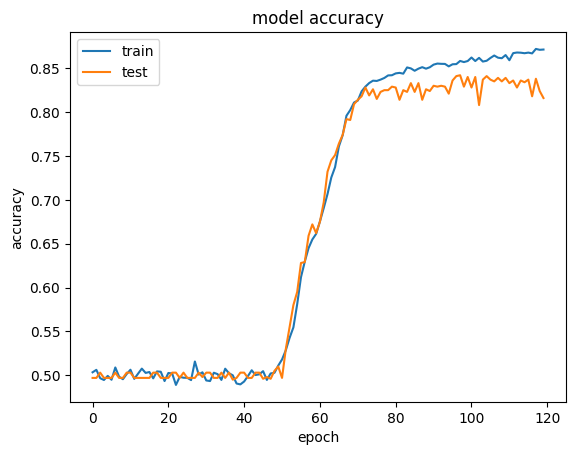

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Saving

In [70]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

# Model Prediction on Unseen data

In [71]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 2ms/step


In [72]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [73]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [74]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [75]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [76]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.999984


In [77]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [78]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [79]:
my_question = "Is the football in the garden ?"

In [80]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [81]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [82]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [83]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 17ms/step


In [84]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9070151
